In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import svm

## Experiment with Support Vector Machine
Here I experimented with the support vector machine based on the exercises of Andrew Ng lectures. I used the sklearn library. In the future I plan to make my own implementation of SVM using sqp optimizer.

Text(0.5, 1.0, 'C = 1')

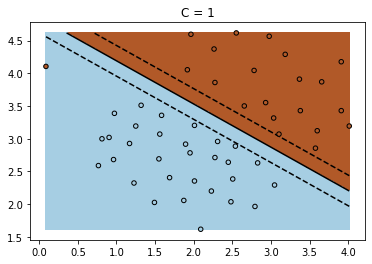

In [10]:
### DATASET 1 ###
rawdata = sio.loadmat('data1ex6',mat_dtype=True)
X = rawdata['X']
y = rawdata['y'].flatten()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.axis('tight')
x_min, x_max  = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.title('C = 1')

Text(0.5, 1.0, 'C = 100')

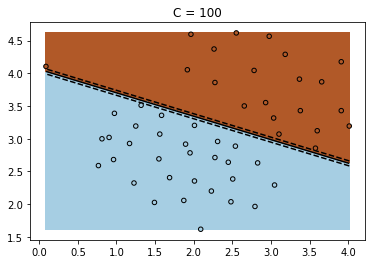

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

plt.axis('tight')
x_min, x_max  = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.title('C = 100')

## Dataset 2

Text(0.5, 1.0, 'C = 1 and RBF kernel')

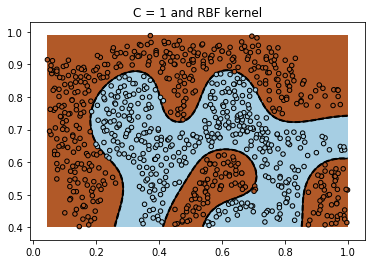

In [12]:
rawdata = sio.loadmat('data2ex6',mat_dtype=True)
X = rawdata['X']
y = rawdata['y'].flatten()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

sigma = 0.1
gamma = 1/(2*sigma**2)
clf = svm.SVC(kernel='rbf', C = 1, gamma=gamma)
clf.fit(X, y)

plt.axis('tight')
x_min, x_max  = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.025, 0, .025])
plt.title('C = 1 and RBF kernel')

## Implementing a custom kernel

In [13]:
def my_kernel(X1, X2,sigma=0.1):
    """
    We create a custom kernel:
    Gaussian or RBF kernel just for the sake of learning

    """

    K = np.exp(-(np.sum((X1-X2)**2)/(2*sigma**2)))
    return K


x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2;
# sim = gaussianKernel(x1, x2, sigma);
print('Kernel Value for the example given',my_kernel(x1, x2,sigma))

Kernel Value for the example given 0.32465246735834974


## Dataset 3
Train using SVC and Gaussian Kernel and use Cross Validation to find the best parameters.

In [14]:
rawdata = sio.loadmat('data3ex6',mat_dtype=True)
X = rawdata['X']
y = rawdata['y'].flatten()
Xval = rawdata['Xval']
yval = rawdata['yval'].flatten()


Sigmas = [0.01,0.03,0.1,0.3,1,3,10,30]
Cs = [0.01,0.03,0.1,0.3,1,3,10,30]
Results = np.zeros((len(Sigmas)*len(Cs),3))
for i,sigma in enumerate(Sigmas):
    for j,c in enumerate(Cs):
        gamma = 1/(2*sigma**2)
        clf = svm.SVC(kernel='rbf', C = c, gamma=gamma)
        clf.fit(X, y)
        Ypred = clf.predict(Xval)
        accuracy = np.mean(np.equal(yval,Ypred))
        Results[i*len(Sigmas)+j,:] = [sigma,c,accuracy]
# print(Results)
BestResult = Results[np.argmax(Results[:,2]),:] 
print('BestSigma:', (BestResult[0]))
print('BestC:', (BestResult[1]))
print('Accuracy:', (BestResult[2]))

BestSigma: 0.1
BestC: 1.0
Accuracy: 0.965


Text(0.5, 1.0, 'C = 1 and Gaussian kernel')

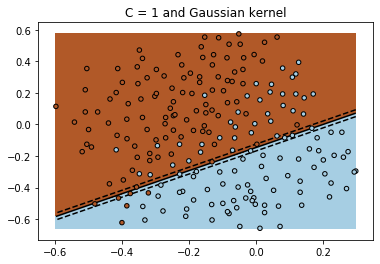

In [15]:
# Plot the Classification with the best parameters.
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
plt.axis('tight')
x_min, x_max  = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.025, 0, .025])
plt.title('C = 1 and Gaussian kernel')